# 時系列データ

## 1. 時系列データ

　ここではテストデータを用いて時系列データを俯瞰する.

```{warning}
　以降では `sandbox.datasets` モジュールにあるデータから取ってくるため, 特にデータロードの部分は同じコードで実施するためには `analytics-sandbox` レポジトリを clone する必要がある. もし clone せずにコードを実施する場合, 適宜 `pandas.read_csv` で取得する必要がある. 場合によってはそのコードも付しているが, ない場合には適宜各必要あり.
```

In [1]:
# グラフ図示に必要なモジュール
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 一部 statsmodels から取得
from statsmodels.datasets import sunspots

# sandbox.datasets にテストデータが保存されている
# sandbox.datasets.{dataset_name}.{dataset_name}.csv に生データ csv が配置
from sandbox import datasets

sns.set()
sns.mpl.rc("font", size=14)

In [2]:
# 1949年から1960年の国際線月別乗客数データ (1000人)
psgr = datasets.air_passengers.load().data

# 外洋を航行中の船舶の方向角速度 (yaw rate) を1秒ごとに記録した時系列
hakusan = datasets.hakusan.load().data

# 毎年の太陽黒点数 (wolfer sunspot number) を記録した時系列
sunspot = sunspots.load().data
sunspot.set_index(sunspot.YEAR.astype(int), drop=True, inplace=True)
sunspot.drop(columns=["YEAR"], inplace=True)

# 東京の毎日の最高気温を16ヶ月にわたって記録したデータ
maxtemp = datasets.maxtemp.load().data

# アメリカの食品産業に従事する労働者の人数を毎月調べた時系列
blsallfood = datasets.blsallfood.load().data

# あるハードウェアの毎月の卸売高を記録したデータ
whard = datasets.whard.load().data

# 地震波の東西成分を約0.02秒間隔で記録した時系列
mye1f = datasets.mye1f.load().data

# 日経225平均株価データで1988/1/4から1993/12/30までの日次終値を示す
nikkei225 = datasets.nikkei225.load().data

### 例 1.1 (air_passengers)

- 非定常性
    - トレンド (上昇トレンド)
    - トレンド周りは周期的な変化あり
    - 平均非定常, 共分散非定常

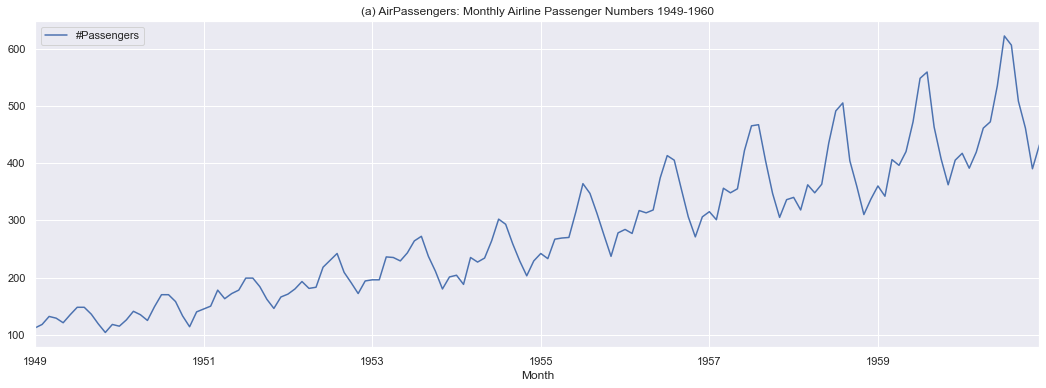

In [3]:
fig, ax = plt.subplots(figsize=(18, 6))
psgr.plot(ax=ax, title=f"(a) {datasets.air_passengers.TITLE}")
plt.show()

### 例 1.2 (hakusan)

- 定常性
    - 0 の付近で波形が前後

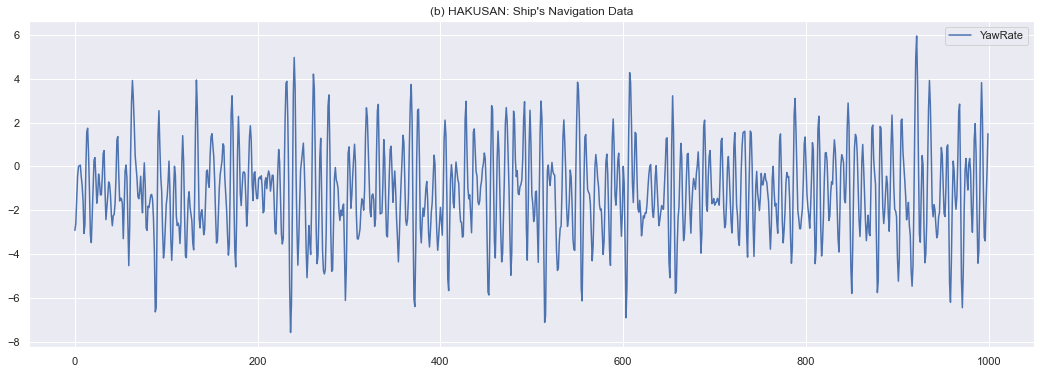

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))
hakusan.plot(y="YawRate", ax=ax, title=f"(b) {datasets.hakusan.TITLE}")
plt.show()

### 例 1.3 (sunspots)

- 非定常性
    - 正値のみを取り, 上下非対称
    - 約10年周期で同様なパターンをとる (疑似周期性)
    - 前後非対称
    

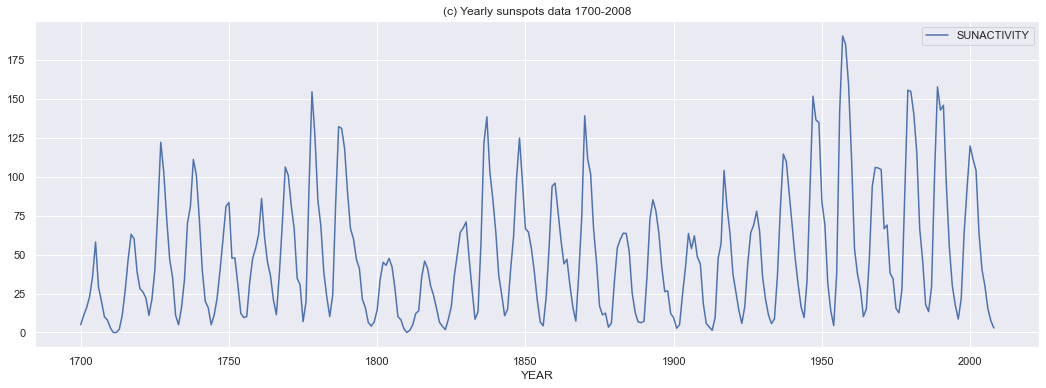

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))
sunspot.plot(ax=ax, title=f"(c) {sunspots.TITLE}")
plt.show()

### 例 1.4 (maxtemp)

- 非定常性
    - トレンドとして年周期あり
    - トレンドの周りはほぼ定常と見られる

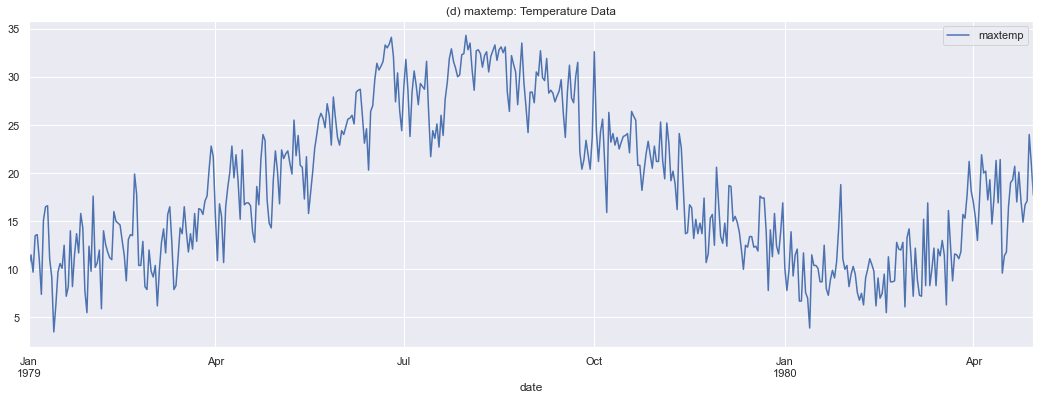

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))
maxtemp.plot(ax=ax, title=f"(d) {datasets.maxtemp.TITLE}")
plt.show()

### 例 1.5 (blsallfood)

- 非定常性
    - 年周期あり
    - 1975年に向けて減少トレンド, それ以降は増加トレンド

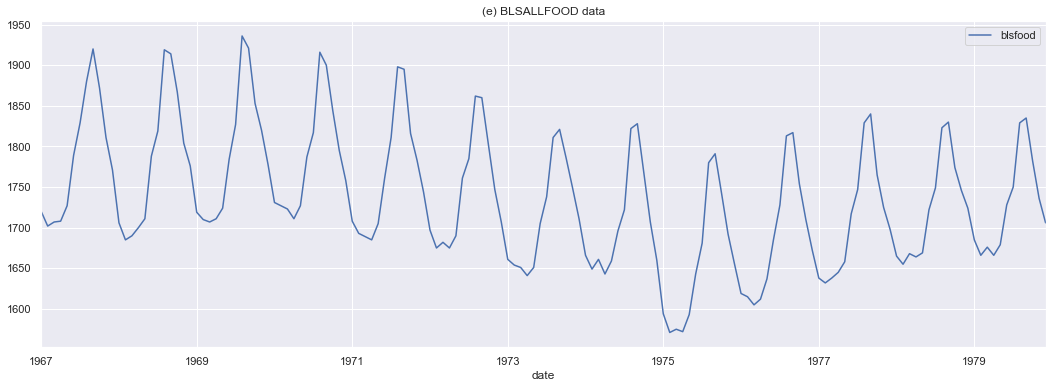

In [7]:
fig, ax = plt.subplots(figsize=(18, 6))
blsallfood.plot(ax=ax, title=f"(e) {datasets.blsallfood.TITLE}")
plt.show()

### 例 1.6 (whard)

- 非定常性
    - 年周期
    - ほぼ同じ割合で増加するトレンドが見られ, それに連動して変動も徐々に増加

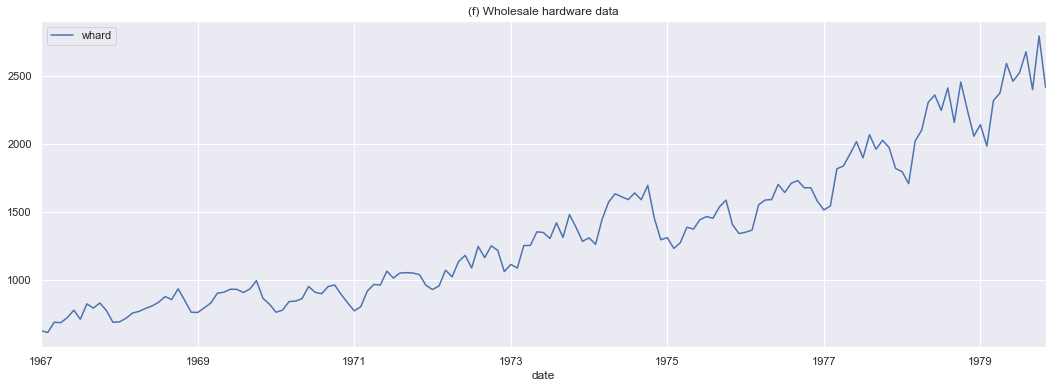

In [8]:
fig, ax = plt.subplots(figsize=(18, 6))
whard.plot(ax=ax, title=f"(f) {datasets.whard.TITLE}")
plt.show()

### 例 1.7 (mye1f)

- 非定常性
    - トレンドなし
    - P波の区間, S波の区間, 地震の終了していく区間で定常 (区分的定常性)
    - 分散非定常, 共分散非定常

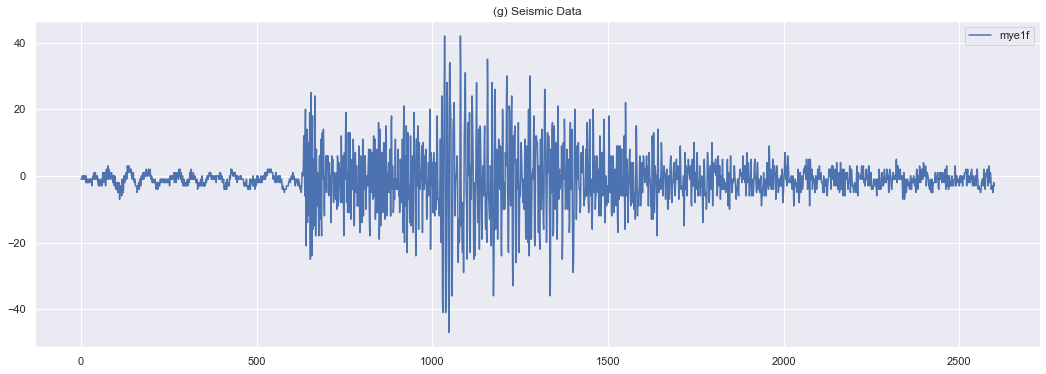

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))
mye1f.plot(ax=ax, title=f"(g) {datasets.mye1f.TITLE}")
plt.show()

### 例 1.8 (nikkei225)

- 非定常性
    - トレンド + 分散変動
    - トレンド下降時にブレが大きい (分散の増加)

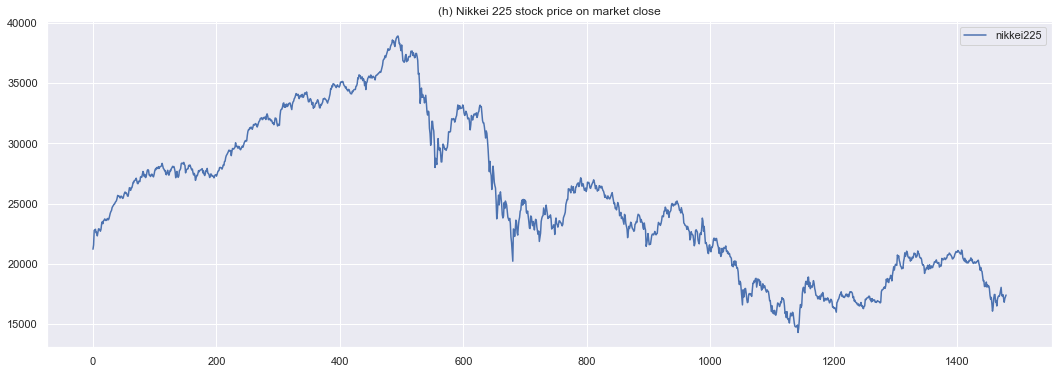

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))
nikkei225.plot(ax=ax, title=f"(h) {datasets.nikkei225.TITLE}")
plt.show()

(tsa:time_series:stationarity)=

## 2. 定常性

　時系列 $y_1, \dots, y_n$ について, 平均と分散を

$$
    \begin{align}
        &\text{(平均)} \quad \mu_t = {\rm E}(y_t)\\
        &\text{(分散)} \quad \sigma_t^2 = {\rm E}[(y_t - \mu_t)^2]
    \end{align}
$$

とおく. ただし $t = 1, \dots, n$ とする. また, 同一時系列内の共分散を

$$
    \begin{align}
        {\rm Cov}(y_s, y_t) = {\rm E}[(y_s - \mu_s)(y_t - \mu_t)], \quad s = 1, \dots, n,　t = 1, \dots, n
    \end{align}
$$

と表し, これを**自己共分散** (autocovariance) と呼ぶ. これらを用いて定常性について定義する.


### 定義 2.1 (弱定常性)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $y_1, \dots, y_n$ の平均, 分散, 自己共分散が時間を通じて変化しないとき**弱定常性** (weakly stationary) であるという. すなわち任意の整数 $k$ について
    
$$
    \begin{align}
        &\mu_{t+k} = \mu_t \\
        &\sigma_{t+k}^2 = \sigma_t^2 \\
        &{\rm Cov}(y_{s+k}, y_{t+k}) = {\rm Cov}(y_s, y_t)
    \end{align}
$$

を満たす.
    
</div>

### 定義 2.2 (強定常性)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $y_1, \dots, y_n$ の分布が時間を通じて不変で, その確率分布を時間軸方向に移動しても変化しないとき**強定常性** (strongly stationary) であるという. すなわち同時密度関数 $f$ について任意の時点の集合 $\{ t_1, \dots, t_m \}$ と任意の整数 $k$ に対して
    
$$
    \begin{align}
        f(y_{t_1 + k}, \dots, y_{t_m + k}) = f(y_{t_1}, \dots, y_{t_m})
    \end{align}
$$

を満たす.
    
</div>

### 定義 2.3 (非定常性)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　常に定常性を満たさない時系列は**非定常** (non-stationary) であるという.

</div>

### 例 2.4 (ホワイトノイズ)

　定常な時系列の最も簡単な例として**ホワイトノイズ** (white noise) が挙げられる. 時系列 $\eta_1, \dots, \eta_n$ がホワイトノイズのとき,
 
$$
    \begin{align}
        {\rm Cov}(\eta_s, \eta_t) = 0 \quad (s \neq t)
    \end{align}
$$

を示す. 時系列 $\{ \varepsilon_t \}$ が正規分布 $N(\mu, \sigma^2)$ に従うホワイトノイズの時 $\varepsilon_t \sim \text{WN}(\mu, \sigma^2)$ と書く.  
　ここでは時系列 $\eta_1, \dots, \eta_n$ が互いに独立した正規分布 $N(0, 1)$ に従うホワイトノイズを考えてみる.

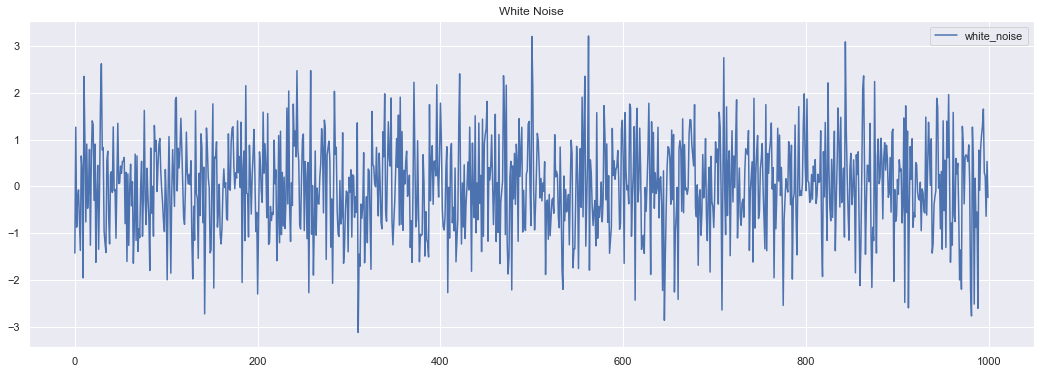

In [11]:
import numpy as np

# 標準正規分布を1000だけ生起
size = 1000
rng = np.random.default_rng(seed=12345)
wn = rng.normal(loc=0, scale=1, size=size)

df_wn = pd.DataFrame(wn, columns=["white_noise"])

fig, ax = plt.subplots(figsize=(18, 6))
df_wn.plot(ax=ax, title="White Noise")
plt.show()

### 例 2.5 (ランダムウォークの非定常性)

　時系列 $y_1, \dots, y_n$ が**ランダムウォーク** (random walk) を構成するとき, 互いに独立な標準正規分布をとるホワイトノイズ $\eta_t$ を用いて

$$
    y_t = y_{t-1} + \eta_t, \quad t = 1, \dots, n, \quad \{\eta_t\} \sim \text{i.i.d} \ N(0, \sigma_{\eta}^2)
$$

と表せられる.  
　ランダムウォーク $\{ y_t \}$ は $\nabla y_t = y_t - y_{t-1} = \eta_t$ と変形したときに, 時系列 $\{ \nabla y_t \}$ はホワイトノイズとなり定常となる. このように一階の階差を取ることで定常過程となる時系列を **一次の和分過程** (integrated process of order one) に従っているといい, $I(1)$ 過程と表現される. $I(0)$ は定常過程として表現される.

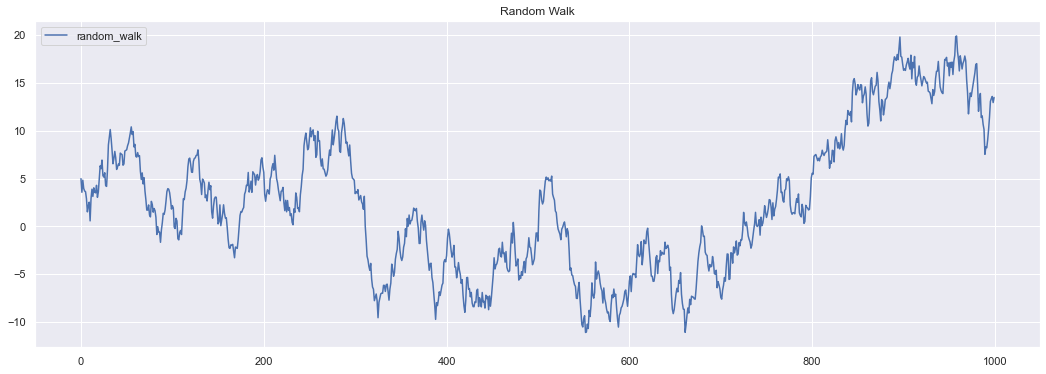

In [12]:
y = np.empty(size)
y[0] = 5

# 先ほど生成したホワイトノイズを利用
for i in range(size - 1):
    y[i + 1] = y[i] + wn[i]

df_y = pd.DataFrame(y, columns=["random_walk"])

fig, ax = plt.subplots(figsize=(18, 6))
df_y.plot(ax=ax, title="Random Walk")
plt.show()

　ランダムウォークは以下のように書ける.
 
$$
    \begin{align}
        y_{t} &= y_{t-1} + \eta_{t} \\
              &= y_{t-2} + \eta_{t-1} + \eta_{t} \\
              &\cdots \\
              &= y_{0} + \eta_{1} + \cdots + \eta_{t}
    \end{align}
$$

ゆえに期待値, 分散をとると

$$
    {\rm E}(y_{t}) = y_{0}, \quad {\rm Var}(y_{t}) = t \sigma_{\eta}^{2}
$$

となり, ${\rm E}(y_{t}) = {\rm E}(y_{t+k})$ であるが, ${\rm Var}(y_{t}) \neq {\rm Var}(y_{t+k})$.
　また, $s < t$ とすれば

$$
    y_{t} = y_{s} + \eta_{s+1} + \eta_{s+2} + \cdots + \eta_{t}
$$

と書けるので,

$$
    \begin{align}
        {\rm Cov}(y_s, y_t) &= {\rm E} \bigl((y_s - y_0)(y_t - y_0) \bigr) \\
                            &= {\rm E} \bigl((y_s - y_0)(y_{s} + \eta_{s+1} + \eta_{s+2} + \cdots + \eta_{t} - y_0) \bigr) \\
                            &= {\rm E} \bigl((y_s - y_0)^2 + (y_s - y_0)(\eta_{s+1} + \eta_{s+2} + \cdots + \eta_{t}) \bigr) \\
                            &= {\rm E} \bigl((y_s - y_0)^2 \bigr) + {\rm E} \bigl( (y_s - y_0)(\eta_{s+1} + \eta_{s+2} + \cdots + \eta_{t}) \bigr) \\
                            &= {\rm E} \bigl((y_s - y_0)^2 \bigr) \\
                            &= {\rm Var} (y_s) \\
                            &= s \sigma_{\eta}^{2}
    \end{align}
$$

ゆえに, ${\rm Cov}(y_{s+k}, y_{t+k}) = (s+k) \sigma_{\eta}^{2}$ より ${\rm Cov}(y_{s+k}, y_{t+k}) \neq {\rm Cov}(y_{s}, y_{t})$ で弱定常性条件を満たさない.  
　また, $y_1, \dots, y_t$ の同時確率密度関数 $f(y_1, \dots, y_t)$ は
 
$$
    f(y_1, \dots, y_t) \propto \prod_{i=1}^{t} { \frac{1}{\sqrt{2 \pi i \sigma_{\eta}^{2}} } \exp{ \biggl(  - \frac{(y_i - y_0)^2}{2 i \sigma_{\eta}^{2}} \biggr) } }
$$

より明らかに $f(y_{t_1 + k}, \dots, y_{t_m + k}) \neq f(y_{t_1}, \dots, y_{t_m})$ であるので強定常性条件も満たさないので, 非定常性である.

### 例 2.5 (AR(1) の定常性)

　1次の自己回帰過程 (AR(1)) に従う時系列 $\{ y_t \}$ は以下のように書ける.
 
$$
    y_t = m + \phi y_{t-1} + \eta_t, \quad t = 1, \dots, n, \quad \{\eta_t\} \sim \text{i.i.d} \ N(0, \sigma_{\eta}^2)
$$

ここで期待値を計算してみる.

$$
    \begin{align}
        {\rm E}(y_t) &= {\rm E}(m + \phi y_{t-1} + \eta_t) \\
                     &= m + \phi {\rm E}(y_{t-1})
    \end{align}
$$

AR(1) が定常性をもつものとすれば, $E(y_t) = E(y_{t-1})$ より $\mu$ とすれば $\phi \neq 1$ とし

$$
    \begin{align}
        \mu = m + \phi \mu \Leftrightarrow \mu = \frac{m}{1-\phi}
    \end{align}
$$

また分散 $\sigma^2$ も同様にして

$$
    \begin{align}
        \sigma^2 = \phi^2 \sigma^2 + \sigma_{\eta}^2 \Leftrightarrow \sigma^2 = \frac{\sigma_{\eta}^2}{1-\phi^2}
    \end{align}
$$

$\sigma^2 > 0$ より定常性を備えるためには $1-\phi^2 > 0 \Leftrightarrow |\phi| < 1$ が必要.


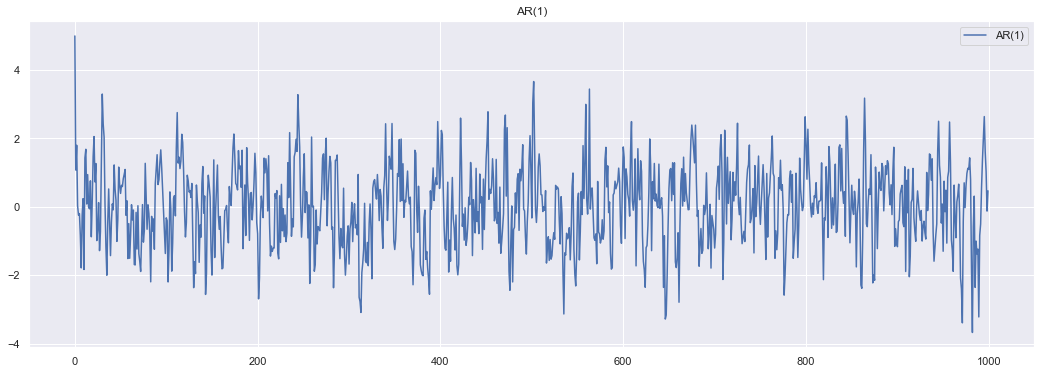

In [13]:
ar1 = np.empty(size)
ar1[0] = 5
phi = 0.5

# 先ほど生成したホワイトノイズを利用
for i in range(size - 1):
    ar1[i + 1] = phi * ar1[i] + wn[i]

df_ar1 = pd.DataFrame(ar1, columns=["AR(1)"])

fig, ax = plt.subplots(figsize=(18, 6))
df_ar1.plot(ax=ax, title="AR(1)")
plt.show()

　また $|\phi| > 1$ の時は時系列が発散してしまう.

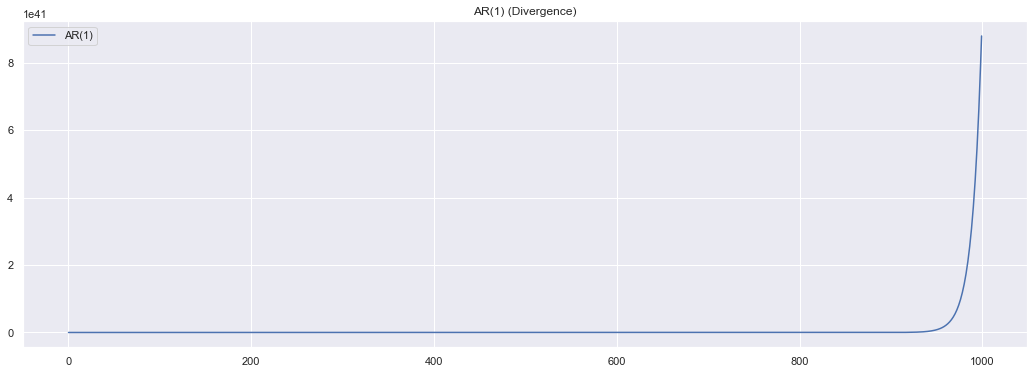

In [14]:
ar1_ = np.empty(size)
ar1_[0] = 5
phi = 1.1

# 先ほど生成したホワイトノイズを利用
for i in range(size - 1):
    ar1_[i + 1] = phi * ar1_[i] + wn[i]

df_ar1_ = pd.DataFrame(ar1_, columns=["AR(1)"])

fig, ax = plt.subplots(figsize=(18, 6))
df_ar1_.plot(ax=ax, title="AR(1) (Divergence)")
plt.show()

### 検定 2.6 (ADF検定)

　**ADF検定 (拡張ディッキー・フラー検定)** (augumented Dickey-Fuller test) は与えられた時系列 $\{ y_t \}$ についての以下の仮設検定を行う.
 
$$
    \begin{align}
        &\text{帰無仮説} \ H_0: y_t \sim I(1) \\
        &\text{対立仮設} \ H_1: y_t \sim I(0)
    \end{align}
$$

ゆえに簡易的に定常性を確認できるが, 仮に帰無仮説が棄却できなかったとしても, $\nabla^2 y_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})$ が $I(0)$ に従う, すなわち $y_t \sim I(2)$ の可能性があるので, 棄却できなかった場合には階差をとったデータで検定を行うことも検討するとよい.

In [15]:
from statsmodels.tsa.stattools import adfuller

ret_ = adfuller(hakusan["YawRate"])

ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -6.119341663798423,
 'pvalue': 8.93355122120649e-08,
 'usedlag': 16,
 'nobs': 983,
 'critvalues': {'1%': -3.4370198458812156,
  '5%': -2.864484708707697,
  '10%': -2.568337912084273},
 'icbest': 2119.0840225668217}

上記の結果から `hakusan["YawRate"]`$\sim I(0)$ と見なしても問題ない.

- `adfstat` : 検定統計量
- `pvalue` : $p$ 値
- `usedlag` : ADF検定で前提としている $\text{AR}(p)$ 過程における $p$ の値 (情報基準で最適な値を採用)
- `nobs` : ADF検定で使用した観測値の数
- `critvalues` : $p$ 値1%, 5%, 10%それぞれに対する統計臨界値
- `icbest` : 情報基準の値

　一方で `nikkei225` はADF検定により $I(0)$ 過程でないことが分かる.

In [16]:
ret_ = adfuller(nikkei225)

ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -0.8863644520571649,
 'pvalue': 0.7924296279527012,
 'usedlag': 10,
 'nobs': 1469,
 'critvalues': {'1%': -3.4348093353507494,
  '5%': -2.863509503599295,
  '10%': -2.5678185447142},
 'icbest': 20958.594912460445}

　`nikkei225` に対して階差をとったデータに対してもう一度ADF検定を取ると帰無仮説が棄却され, グラフ化すると定常的な推移を示す.

In [17]:
nikkei225_ = pd.DataFrame(np.diff(nikkei225["nikkei225"]), columns=["diff_nikkei225"])

ret_ = adfuller(nikkei225_)
ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -10.217930348147522,
 'pvalue': 5.419565541032332e-18,
 'usedlag': 9,
 'nobs': 1469,
 'critvalues': {'1%': -3.4348093353507494,
  '5%': -2.863509503599295,
  '10%': -2.5678185447142},
 'icbest': 20943.788988444103}

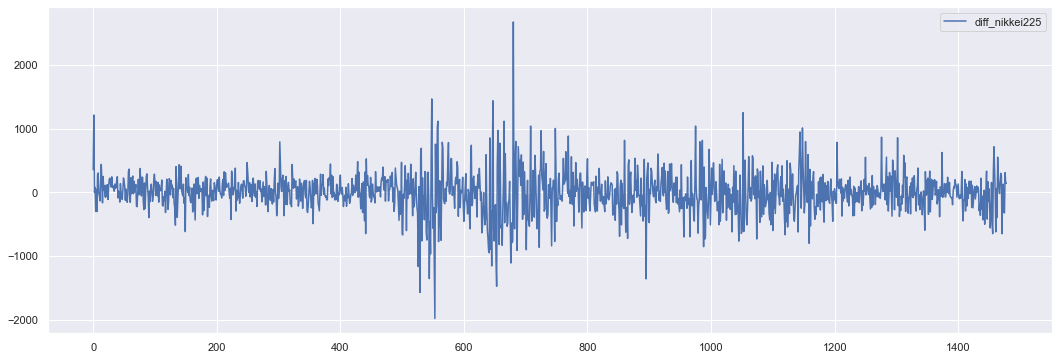

In [18]:
fig, ax = plt.subplots(figsize=(18, 6))
nikkei225_.plot(ax=ax)
plt.show()

## 3. コレログラム

　以降では時系列 $\{ y_n \}$ に定常性を仮定すると平均と, 自己共分散は以下のように書ける.
 
$$
    \begin{align}
        \text{(平均)} \quad &\mu = {\rm E}(y_n) \\
        \text{(自己共分散)} \quad &C_k = {\rm Cov}(y_n, y_{n-k}) = {\rm E}\bigl[ (y_n - \mu)(y_{n-k} - \mu) \bigr]
    \end{align}
$$

コレログラムを作成するのに必要な自己相関関数, 偏自己相関関数を定義する上では上記を前提に進める.

### 定義 3.1 (自己相関関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　定常時系列における**自己相関関数** (autocorrelation function, ACF) は以下で定義される.
    
$$
    \begin{align}
        \rho_k = \frac{{\rm Cov}(y_n, y_{n-k})}{\sqrt{{\rm Var}(y_n){\rm Var}(y_{n-k})}} = \frac{C_k}{C_0}
    \end{align}
$$
</div>

　時系列データ $\{ y_1, \cdots, y_N \}$ が与えられたとき, 平均 $\mu$, 自己共分散 $C_k$ および自己相関関数 $\rho_k$ の推定値 $\hat{\mu}_k, \hat{C}_k, \hat{\rho}_k$ は次の式で求められる.

$$
    \begin{align}
        & \hat{\mu}_k = \frac{1}{N} \sum_{n=1}^{N}{y_n}                                        \\
        & \hat{C}_k = \frac{1}{N} \sum_{n=k+1}^{N}{(y_n - \hat{\mu}_k)(y_{n-k} - \hat{\mu}_k)} \\
        & \hat{\rho}_k = \frac{\hat{C}_k}{\hat{C}_0}
    \end{align}
$$

それぞれ**標本平均**(sample mean), **標本自己共分散** (sample autocovariance), **標本自己相関関数** (sample autocorrelation function) と言う.

### 定義 3.2 (偏自己相関関数)

　自己相関関数において他の時系列の影響までは勘案できていない. すなわち, $y_n, y_{n-k}$ の自己相関の中には時点 $n-1, n-2, \cdots, n-k+1$ の影響を含みうる. ここで以下の等式が成立するものとする.

$$
    \begin{align}
        y_t - \mu = \phi_{k,1} (y_{t-1} - \mu) + \phi_{k,2} (y_{t-2} - \mu) + \cdots + \phi_{k,k} (y_{t-k} - \mu)
    \end{align}
$$

この等式に対して $(y_{t-i} - \mu) \quad (i = 1, \dots, k)$ を両辺に掛け期待値を取ると

$$
    \begin{align}
        & (y_t - \mu)(y_{t-i} - \mu) = \phi_{k,1} (y_{t-1} - \mu)(y_{t-i} - \mu) + \phi_{k,2} (y_{t-2} - \mu)(y_{t-i} - \mu) + \cdots + \phi_{k,k} (y_{t-k} - \mu)(y_{t-i} - \mu) \\
        \Leftrightarrow \ & {\rm E}(y_t - \mu)(y_{t-i} - \mu) = \phi_{k,1} {\rm E}(y_{t-1} - \mu)(y_{t-i} - \mu) + \phi_{k,2} {\rm E}(y_{t-2} - \mu)(y_{t-i} - \mu) + \cdots + \phi_{k,k} {\rm E}(y_{t-k} - \mu)(y_{t-i} - \mu) \\
        \Leftrightarrow \ &  C_i = \phi_{k,1} C_{i-1} + \phi_{k,2} C_{i-2} + \cdots + \phi_{k,k} C_{k-i} \quad (i = 1, \cdots, k)
    \end{align}
$$

両辺を $C_0$ で割ると

$$
    \begin{align}
        \rho_i = \phi_{k,1} \rho_{i-1} + \phi_{k,2} \rho_{i-2} + \cdots + \phi_{k,k} \rho_{k-i} \quad (i = 1, \cdots, k)
    \end{align}
$$

となる. 従って, 行列表現をすると

$$
    \begin{align}
        \begin{bmatrix}
            \rho_1 \\ \rho_2 \\ \vdots \\ \rho_k
        \end{bmatrix} =
        \begin{bmatrix}
            \rho_0     & \rho_1     & \cdots & \rho_{k-1} \\ 
            \rho_1     & \rho_0     & \cdots & \rho_{k-2} \\ 
            \vdots     & \vdots     & \ddots & \vdots     \\ 
            \rho_{k-1} & \rho_{k-2} & \cdots & \rho_0
        \end{bmatrix}
        \begin{bmatrix}
            \phi_{k,1} \\ \phi_{k,2} \\ \vdots \\ \phi_{k,k}
        \end{bmatrix}
    \end{align}
$$

となる.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　定常時系列における**偏自己相関関数** (partial autocorrelation function, PACF) $\phi_{k,k}$ は以下で定義される.
    
$$
    \begin{align}
        \begin{bmatrix}
            \phi_{k,1} \\ \phi_{k,2} \\ \vdots \\ \phi_{k,k}
        \end{bmatrix} = 
        \begin{bmatrix}
            \rho_0     & \rho_1     & \cdots & \rho_{k-1} \\ 
            \rho_1     & \rho_0     & \cdots & \rho_{k-2} \\ 
            \vdots     & \vdots     & \ddots & \vdots     \\ 
            \rho_{k-1} & \rho_{k-2} & \cdots & \rho_0
        \end{bmatrix}^{\ -1}
        \begin{bmatrix}
            \rho_1 \\ \rho_2 \\ \vdots \\ \rho_k
        \end{bmatrix}
    \end{align}
$$

</div>

### 例 3.3 (コレログラム)

　今まで定義した自己相関関数, 偏自己相関関数をプロットしたグラフのことを**コレログラフ** (correlogram) と言い時系列データで試してみる.  
　`hakusan` データは比較的定常的な時系列データだが, コレログラムにおいても大きく相関のあるラグは確認されない.

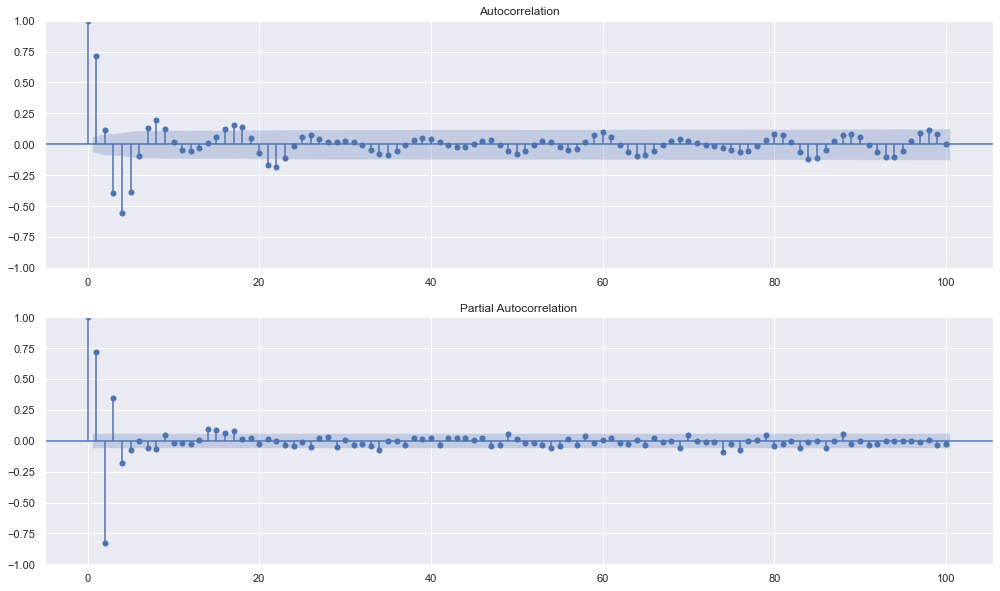

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(17, 10))
ax1 = fig.add_subplot(211)
fig = plot_acf(hakusan["YawRate"], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(hakusan["YawRate"], method="ywm", lags=100, ax=ax2)

一方で `blsallfood` データは12ヶ月周期が波形から見えるが, 実際にラグが11の時の ACF, PACF の相関が大きいことが分かる.

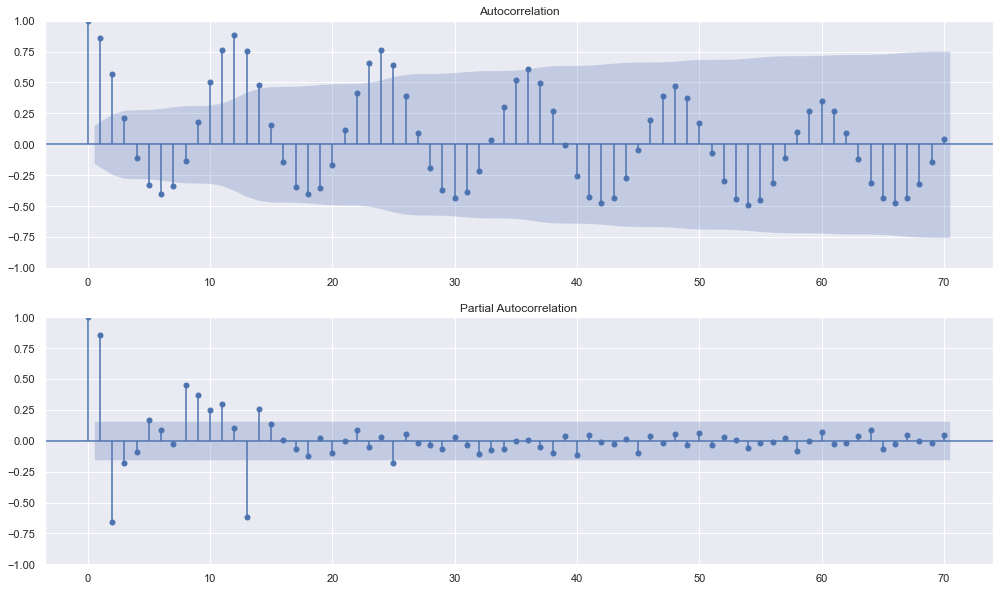

In [20]:
fig = plt.figure(figsize=(17, 10))
ax1 = fig.add_subplot(211)
fig = plot_acf(blsallfood, lags=70, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(blsallfood, method="ywm", lags=70, ax=ax2)

## 4. 時系列モデリングと定常性

　時系列モデリングは通常は定常性を仮定してモデリングすることが中心である (モデルによっては非定常時系列データでも対応するものがあるが, モデリングのどこかに定常性を担保するための要素が入っている). ゆえにデータの前処理を行なって定常モデリングを行うことが必要.
 
- 定常モデリング (ARモデル, ARMAモデルなど)
    1. データに対する前処理でできる限り定常性を持たせる
    1. 定常モデリングを実施する
    
- 非定常モデリング
    - 平均が非定常
        - 時刻が経過するにつれてなだらかに推移する:
            - ARIMA(X)
            - SARIMA(X)
        - 特定の区分に分けることで平均が定常的と見なせる:
            - レベルシフトモデル
    - 平均・分散が非定常
        - 特定の時間区分ごとに見ると定常的と見なせる:
            - 局所定常ARモデル
        - トレンド要因, 季節要因, 誤差要因といった風に直接モデリング:
            - 状態空間モデル

## 5. データの前処理による定常化

　与えられた時系列が定常性を持っていることの方が稀なので, 非定常な時系列データに対して変数変換を行うことで定常に近づける.

### 例 5.1 (対数変換)

　金額や人数などのデータのように値の増加に伴って変動の大きさも増大する特徴をもつ時系列に有効である. 対数変換の特徴として

- 分散の一様化 (分散定常化に寄与)
- トレンドは残るので, トレンドのある時系列に対して平均定常化を検討することは残る
- 正値時系列の無制約化 (時系列の区間変換: $(0, \infty) \rightarrow (-\infty, \infty)$)

が挙げられる.

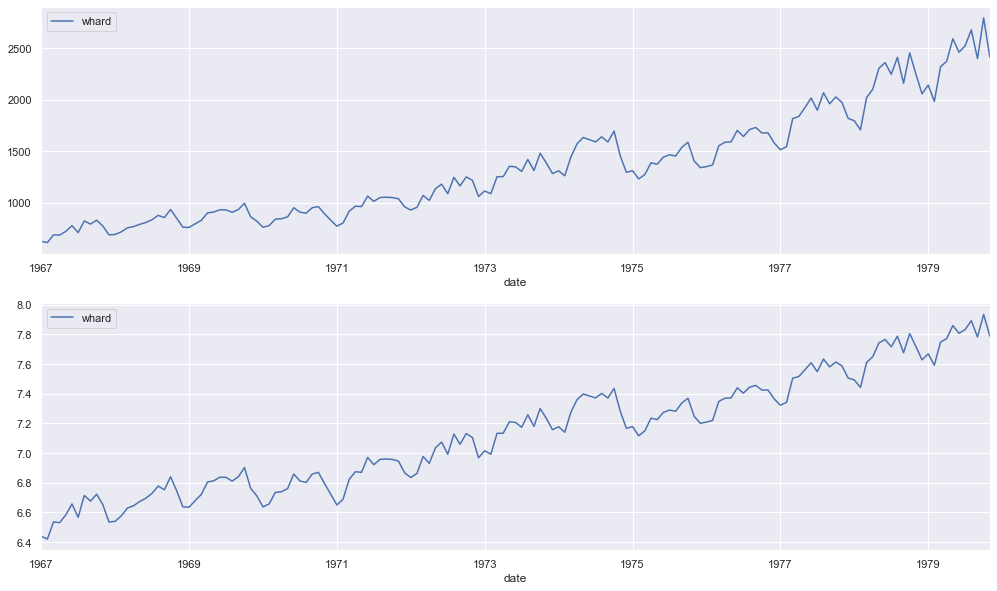

In [21]:
fig = plt.figure(figsize=(17, 10))

# 対数変換を行う前
ax1 = fig.add_subplot(211)
whard.plot(ax=ax1, label="Original")

# 対数変換後
ax2 = fig.add_subplot(212)
whard_transformed = whard.copy()
whard_transformed["whard"] = np.log(whard["whard"])
whard_transformed.plot(ax=ax2, label="Log-transformed")

plt.show()

(tsa:time_series:preprocess:boxcox)=

### 例 5.2 (Box-Cox 変換)

　**Boc-Cox変換** (Box-Cox transformation) は正値のデータ系列を**正規分布に近づけるための変換**手法で以下のように変換を行う.
 
$$
    \begin{align}
        y_\lambda = \begin{cases}
            \dfrac{x^{\lambda} - 1}{\lambda} \quad &(\lambda \neq 0) \\
            \log{x} \quad &(\lambda \neq 0)
        \end{cases}
    \end{align}
$$

従って問題になるのは, $\lambda$ をどう決めるかだが, [ `SciPy` ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) では対数尤度関数の値が最大となるような値を決定する.

In [22]:
from scipy.stats import boxcox

boxcox, lam = boxcox(psgr["#Passengers"])
psgr_boxcox = pd.DataFrame(boxcox, columns=["#Passengers_Boxcox"], index=psgr.index)
psgr_boxcox

,#Passengers_Boxcox
Month,
1949-01-01,6.827490
1949-02-01,6.932822
1949-03-01,7.161892
1949-04-01,7.114611
1949-05-01,6.983787
...,...
1960-08-01,10.684049
1960-09-01,10.234573
1960-10-01,9.992159


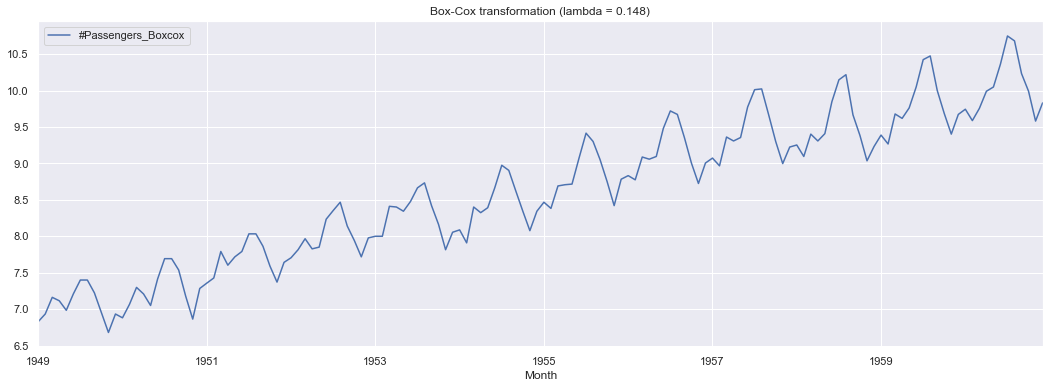

In [23]:
fig, ax = plt.subplots(figsize=(18, 6))
psgr_boxcox.plot(ax=ax, title=f"Box-Cox transformation (lambda = {round(lam, 3)})")
plt.show()

(tsa:time_series:preprocess:difference)=

### 例 5.3 (階差)

　トレンドの含まれている時系列に対しトレンド影響をなくして解析する上で**階差 (差分)** を取ることは非常に有効である. 例えば直線トレンドを有していたとすれば $y_n = a+bn$ として

$$
    \begin{align}
        \nabla y_n &= y_n - y_{n-1} \\
                   &= (a + bn) - (a + b(n-1)) \\
                   &= b
    \end{align}
$$

となって直線の傾き部分を打ち消すことができ, 直線トレンドの傾きの影響を取り除ける.
　また, $y = a + bn + cn^2$ と 2 次曲線のトレンドを有するときに
 
$$
    \begin{align}
        \nabla y_n &= y_n - y_{n-1} \\
                   &= (a + bn + cn^2) - (a + b(n-1) + c(n-1)^2) \\
                   &= (b-c) + 2cn
    \end{align}
$$

なので 2 階階差は

$$
    \begin{align}
        \nabla^2 y_n &= \nabla y_n - \nabla y_{n-1} \\
                     &= ((b-c) + 2cn) - ((b-c) + 2c(n-1)) \\
                     &= 2c
    \end{align}
$$

より 1 次成分, 2 次成分いずれも打ち消されることが分かる.  
　`air_passengers` データにはまだ線形トレンドが見られていたので, 階差によって打ち消してみる.

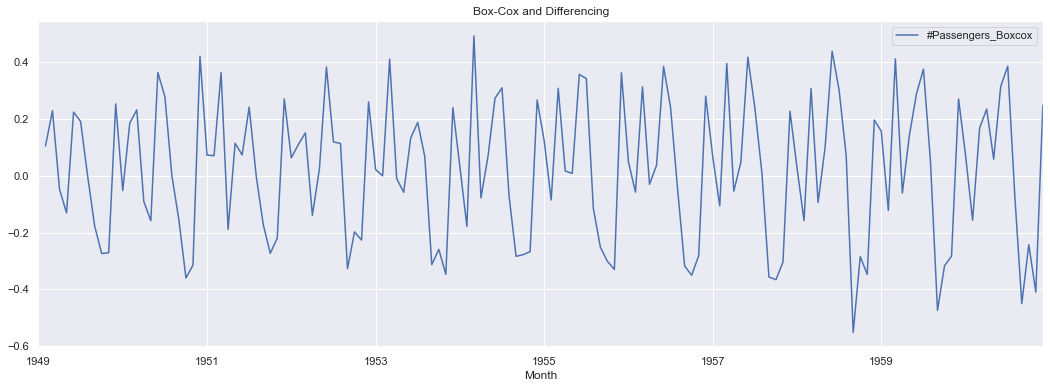

In [24]:
psgr_boxcox_diff = pd.DataFrame(psgr_boxcox - psgr_boxcox.shift(), index=psgr.index)

fig, ax = plt.subplots(figsize=(18, 6))
psgr_boxcox_diff.plot(ax=ax, title="Box-Cox and Differencing")
plt.show()

ADF検定により実際に $I(0)$ 過程であると見なすことができる.

In [25]:
ret_ = adfuller(psgr_boxcox_diff.dropna())
ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -2.871707528317435,
 'pvalue': 0.04873833392661311,
 'usedlag': 14,
 'nobs': 128,
 'critvalues': {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 'icbest': -234.74315733709795}